In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import scanpy.external as sce
import harmonypy
import palantir
# Plotting imports
import os
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

import random
random.seed(101)


findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.


In [2]:
%matplotlib inline

In [3]:
week6_ad = sc.read_10x_mtx("/bigdata/faustmanlab/bch/sc-testis/human/gse143356/week6")
week6_ad.var_names_make_unique()

week7_ad = sc.read_10x_mtx("/bigdata/faustmanlab/bch/sc-testis/human/gse143356/week7")
week7_ad.var_names_make_unique()

week8_ad = sc.read_10x_mtx("/bigdata/faustmanlab/bch/sc-testis/human/gse143356/week8")
week8_ad.var_names_make_unique()

week15_ad = sc.read_10x_mtx("/bigdata/faustmanlab/bch/sc-testis/human/gse143356/week15")
week15_ad.var_names_make_unique()

week16_ad = sc.read_10x_mtx("/bigdata/faustmanlab/bch/sc-testis/human/gse143356/week16")
week16_ad.var_names_make_unique()

week12_ad = sc.read_10x_mtx("/bigdata/faustmanlab/bch/sc-testis/human/gse143356/week12/Male_Week_12_gene_matrix/")
week12_ad.var_names_make_unique()


In [4]:
week6_ad.var['mt'] = week6_ad.var_names.str.startswith('MT-')
week7_ad.var['mt'] = week7_ad.var_names.str.startswith('MT-')
week8_ad.var['mt'] = week8_ad.var_names.str.startswith('MT-')
week12_ad.var['mt'] = week12_ad.var_names.str.startswith('MT-')
week15_ad.var['mt'] = week15_ad.var_names.str.startswith('MT-')
week16_ad.var['mt'] = week16_ad.var_names.str.startswith('MT-')


In [5]:
sc.pp.calculate_qc_metrics(week6_ad, qc_vars=['mt'], 
                           inplace=True, log1p=False)
sc.pp.calculate_qc_metrics(week7_ad, qc_vars=['mt'], 
                           inplace=True, log1p=False)
sc.pp.calculate_qc_metrics(week8_ad, qc_vars=['mt'], 
                           inplace=True, log1p=False)
sc.pp.calculate_qc_metrics(week12_ad, qc_vars=['mt'], 
                           inplace=True, log1p=False)
sc.pp.calculate_qc_metrics(week15_ad, qc_vars=['mt'], 
                           inplace=True, log1p=False)
sc.pp.calculate_qc_metrics(week16_ad, qc_vars=['mt'], 
                           inplace=True, log1p=False)

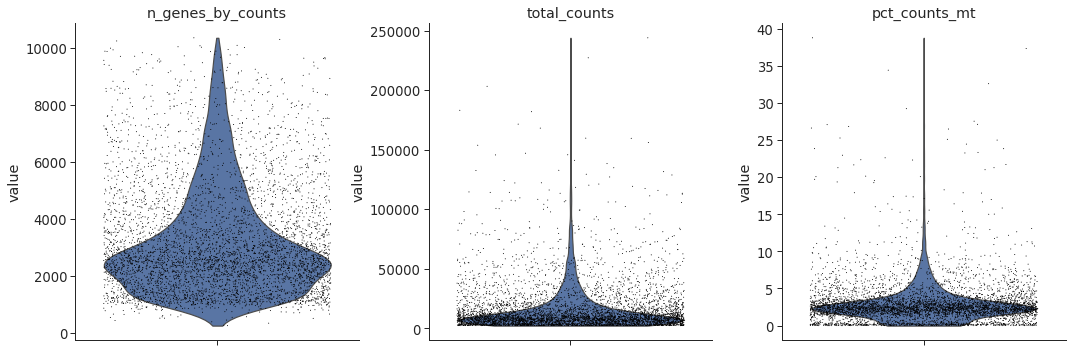

In [6]:
sc.pl.violin(week7_ad, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)
             

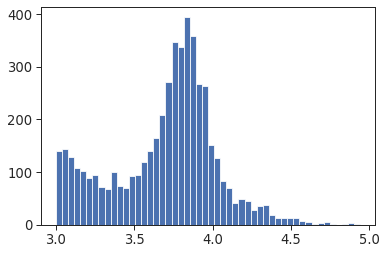

In [7]:
plt.hist(np.log10(week15_ad.obs['total_counts']), 50);

In [8]:
week8_ad.obs.head(n=10)


,n_genes_by_counts,total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,total_counts_mt,pct_counts_mt
AAACCTGAGACTAGAT-1,3411,14498.0,30.969789,47.482411,58.656366,70.651124,279.0,1.924403
AAACCTGAGCGCTTAT-1,3853,15289.0,28.438747,43.331807,54.568644,66.884688,378.0,2.472366
AAACCTGAGGACGAAA-1,3212,10791.0,27.958484,41.960893,52.488185,65.647299,371.0,3.438050
AAACCTGCACGTCAGC-1,3953,18233.0,30.505128,44.605934,55.333736,68.200516,530.0,2.906817
AAACCTGCATGGAATA-1,3330,12115.0,28.650433,44.036319,54.989682,67.362773,332.0,2.740404
AAACCTGGTAGAGTGC-1,2619,10050.0,35.711443,53.114428,63.104478,74.278607,184.0,1.830846
AAACCTGGTATGGTTC-1,3816,16895.0,31.216336,47.090855,57.129328,69.428825,419.0,2.480024
AAACCTGGTCGGCACT-1,4356,14872.0,27.407208,37.553792,47.424691,59.897795,1945.0,13.078268
AAACCTGGTGCAGTAG-1,2303,6759.0,27.193372,41.278296,53.395473,68.486462,120.0,1.775411
AAACCTGTCCTTTCTC-1,3015,9038.0,30.095154,41.015711,51.349856,64.284134,987.0,10.920557


In [9]:
# Set the dataset identifier in both anndatas
week6_ad.obs['Dataset'] = 'week6'
week7_ad.obs['Dataset'] = 'week7'
week8_ad.obs['Dataset'] = 'week8'
week12_ad.obs['Dataset'] = 'week12'
week15_ad.obs['Dataset'] = 'week15'
week16_ad.obs['Dataset'] = 'week16'





In [10]:
emb_all = week6_ad.concatenate(week7_ad,week8_ad)

fet_all = week12_ad.concatenate(week15_ad,week16_ad)

both_all = week6_ad.concatenate(week7_ad,week8_ad, week12_ad, week15_ad, week16_ad)

/home/NETID/bhansen3/anaconda3/envs/sc-testis/lib/python3.9/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],
/home/NETID/bhansen3/anaconda3/envs/sc-testis/lib/python3.9/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],
/home/NETID/bhansen3/anaconda3/envs/sc-testis/lib/python3.9/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to n

Without Batch Correction

In [11]:
sc.pp.filter_genes(emb_all, min_cells=10)
sc.pp.normalize_total(emb_all)
sc.pp.log1p(emb_all)

sc.pp.filter_genes(fet_all, min_cells=10)
sc.pp.normalize_total(fet_all)
sc.pp.log1p(fet_all)


In [12]:
sc.pp.highly_variable_genes(emb_all)
sc.pp.pca(emb_all)

sc.pp.highly_variable_genes(fet_all)
sc.pp.pca(fet_all)

In [13]:
sc.pp.neighbors(emb_all)
sc.tl.umap(emb_all)
sc.tl.leiden(emb_all)

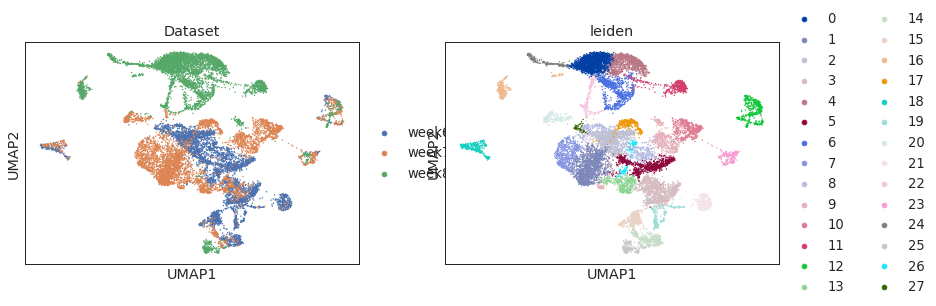

In [14]:
sc.pl.umap(emb_all, color=['Dataset', 'leiden'])

Batch correction

In [15]:
sc.external.pp.harmony_integrate(emb_all, key='Dataset')



2022-06-26 18:17:37,082 - harmonypy - INFO - Iteration 1 of 10
2022-06-26 18:17:41,206 - harmonypy - INFO - Iteration 2 of 10
2022-06-26 18:17:45,307 - harmonypy - INFO - Iteration 3 of 10
2022-06-26 18:17:49,565 - harmonypy - INFO - Iteration 4 of 10
2022-06-26 18:17:53,718 - harmonypy - INFO - Iteration 5 of 10
2022-06-26 18:17:57,999 - harmonypy - INFO - Iteration 6 of 10
2022-06-26 18:18:00,629 - harmonypy - INFO - Iteration 7 of 10
2022-06-26 18:18:04,022 - harmonypy - INFO - Iteration 8 of 10
2022-06-26 18:18:06,497 - harmonypy - INFO - Iteration 9 of 10
2022-06-26 18:18:10,042 - harmonypy - INFO - Iteration 10 of 10
2022-06-26 18:18:12,488 - harmonypy - INFO - Stopped before convergence


In [16]:
emb_all.obs['leiden_no_correction'] = emb_all.obs['leiden']
emb_all.obsm['X_umap_no_correction'] = emb_all.obsm['X_umap']

In [17]:
sc.pp.neighbors(emb_all, use_rep='X_pca_harmony')
# UMAP and leiden use results from the neighborhood computation. Therefore we dont need to specify harmony
sc.tl.umap(emb_all)
sc.tl.leiden(emb_all)

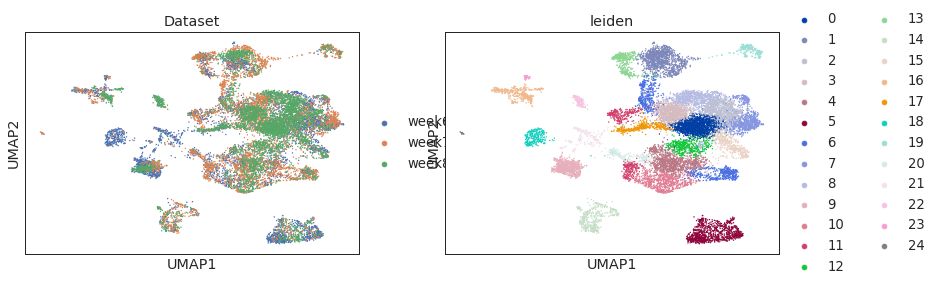

In [18]:
sc.pl.umap(emb_all, color=['Dataset', 'leiden'])


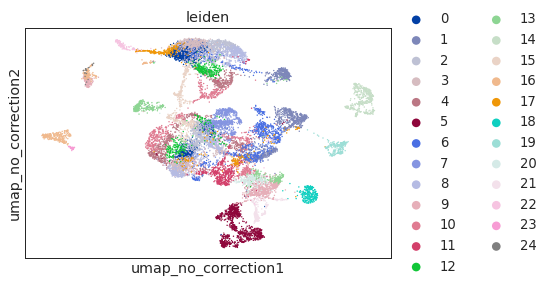

In [19]:
sc.pl.scatter(emb_all, basis='umap_no_correction', color='leiden')

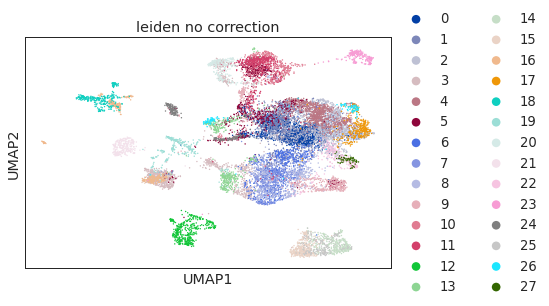

In [20]:
sc.pl.scatter(emb_all, basis='umap', color='leiden_no_correction')

In [21]:
sc.pp.neighbors(fet_all)
sc.tl.umap(fet_all)
sc.tl.leiden(fet_all)

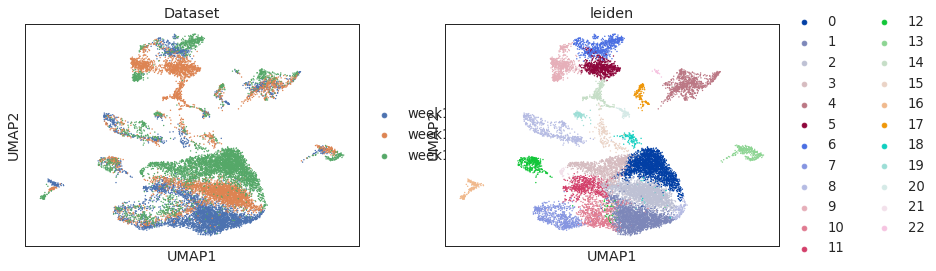

In [22]:
sc.pl.umap(fet_all, color=['Dataset', 'leiden'])

In [23]:
sc.external.pp.harmony_integrate(fet_all, key='Dataset')

2022-06-26 18:19:10,884 - harmonypy - INFO - Iteration 1 of 10
2022-06-26 18:19:15,415 - harmonypy - INFO - Iteration 2 of 10
2022-06-26 18:19:20,015 - harmonypy - INFO - Iteration 3 of 10
2022-06-26 18:19:24,387 - harmonypy - INFO - Iteration 4 of 10
2022-06-26 18:19:28,840 - harmonypy - INFO - Iteration 5 of 10
2022-06-26 18:19:31,934 - harmonypy - INFO - Converged after 5 iterations


In [24]:
fet_all.obs['leiden_no_correction'] = fet_all.obs['leiden']
fet_all.obsm['X_umap_no_correction'] = fet_all.obsm['X_umap']

In [25]:
sc.pp.neighbors(fet_all, use_rep='X_pca_harmony')
# UMAP and leiden use results from the neighborhood computation. Therefore we dont need to specify harmony
sc.tl.umap(fet_all)
sc.tl.leiden(fet_all)

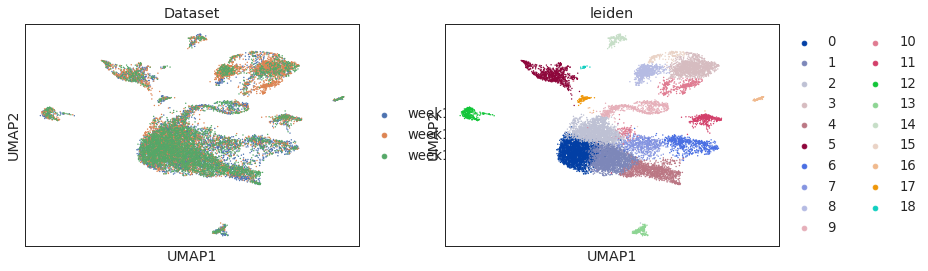

In [26]:
sc.pl.umap(fet_all, color=['Dataset', 'leiden'])

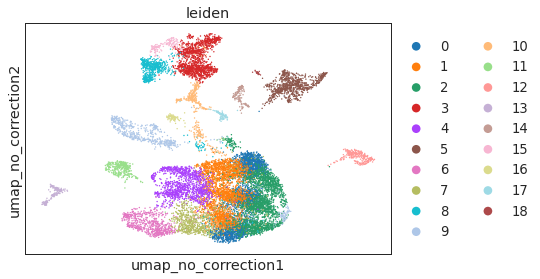

In [27]:
sc.pl.scatter(fet_all, basis='umap_no_correction', color='leiden')

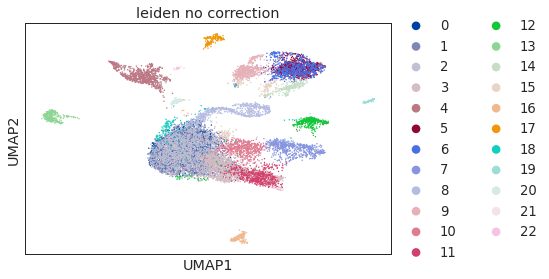

In [28]:
sc.pl.scatter(fet_all, basis='umap', color='leiden_no_correction')

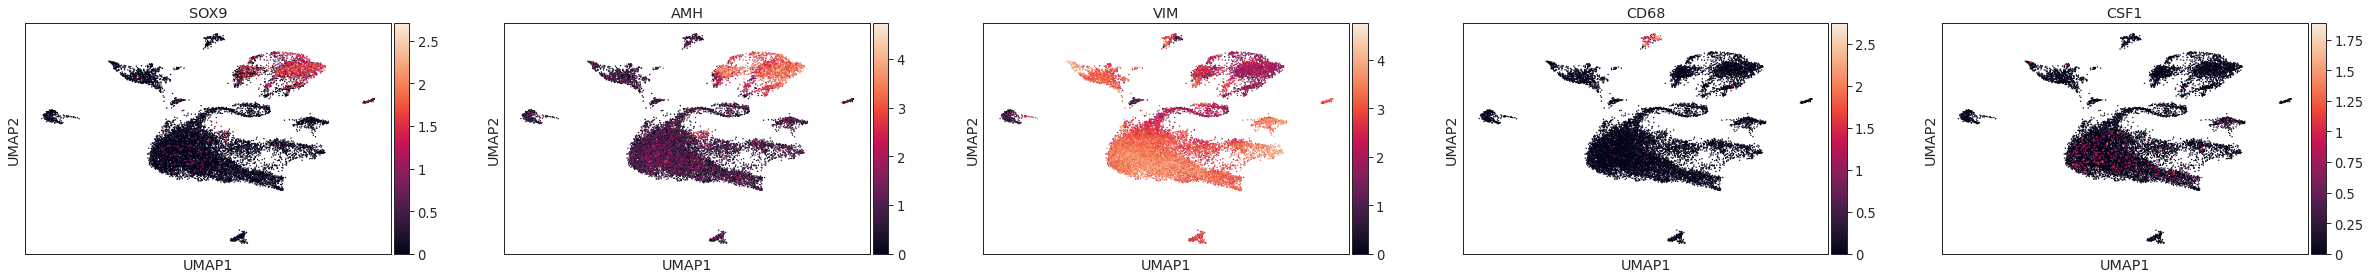

In [29]:
sc.pl.scatter(fet_all, basis='umap', color=['SOX9', 'AMH', 'VIM', 'CD68', 'CSF1'])

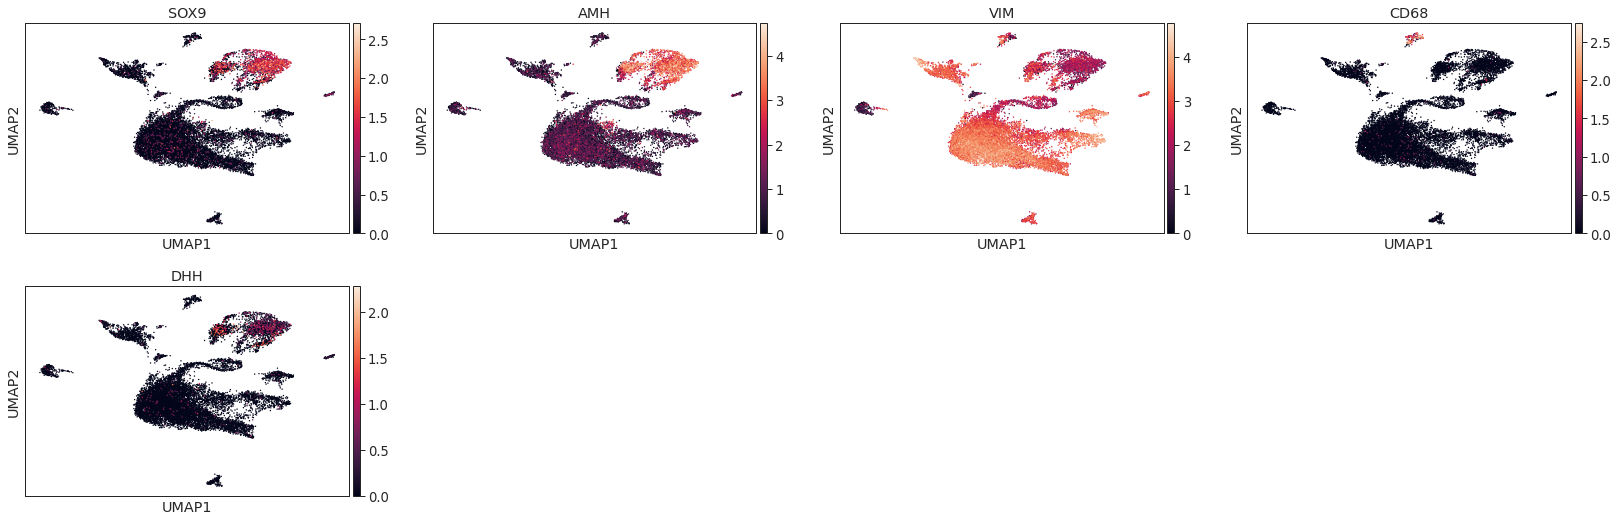

In [30]:
sc.pl.umap(fet_all, color=['SOX9', 'AMH', 'VIM', 'CD68', 'DHH'])

In [33]:
sc.pp.filter_genes(both_all, min_cells=10)
sc.pp.normalize_total(both_all)
sc.pp.log1p(both_all)

sc.pp.neighbors(both_all)
sc.tl.umap(both_all)
sc.tl.leiden(both_all)

         Falling back to preprocessing with `sc.pp.pca` and default params.


In [34]:
sc.external.pp.harmony_integrate(both_all, key='Dataset')



2022-06-26 18:27:56,195 - harmonypy - INFO - Iteration 1 of 10
2022-06-26 18:28:09,563 - harmonypy - INFO - Iteration 2 of 10
2022-06-26 18:28:22,970 - harmonypy - INFO - Iteration 3 of 10
2022-06-26 18:28:36,724 - harmonypy - INFO - Iteration 4 of 10
2022-06-26 18:28:49,583 - harmonypy - INFO - Iteration 5 of 10
2022-06-26 18:29:02,929 - harmonypy - INFO - Iteration 6 of 10
2022-06-26 18:29:15,435 - harmonypy - INFO - Iteration 7 of 10
2022-06-26 18:29:24,514 - harmonypy - INFO - Iteration 8 of 10
2022-06-26 18:29:32,069 - harmonypy - INFO - Iteration 9 of 10
2022-06-26 18:29:39,818 - harmonypy - INFO - Iteration 10 of 10
2022-06-26 18:29:53,037 - harmonypy - INFO - Stopped before convergence
